In [1]:
import pandas as pd
import os
PUZZLE_PATH = 'data/TacticDB.csv'

df = pd.read_csv(PUZZLE_PATH, nrows=10)
board_fen = df['FEN'][0]
df.head(1)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,2f74K,4rk2/ppN2pb1/2pp4/6p1/2P5/6PQ/Pq6/KR6 w - - 0 31,b1b2 e8e1,501,86,100,120,pin,https://lichess.org/16NHiHN4#61,NaN


['Bh7', 'Bg6', 'Ba6', 'Bf5', 'Bb5', 'Be4', 'Bc4', 'Be2', 'Bc2', 'Bf1', 'Bb1', 'Kc2', 'c2', 'd1=Q+', 'd1=R+', 'd1=B', 'd1=N']


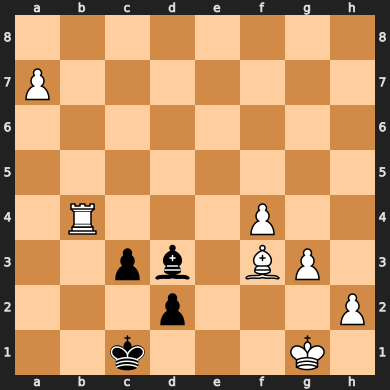

In [2]:
import chess 

# board = chess.Board(board_fen)
board = chess.Board("8/P7/8/8/1R3P2/2pb1BP1/3p3P/2k3K1 b - - 0 54")
print([board.san(move) for move in board.legal_moves])
board

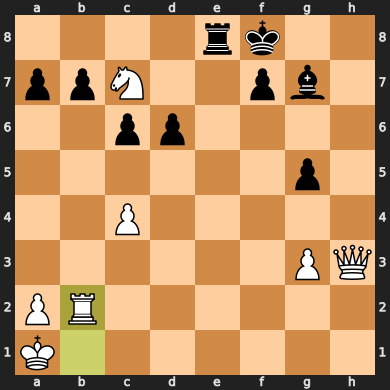

In [3]:
import chess 

board = chess.Board(board_fen)
solution = df['Moves'][0].split(' ')
board.push_san(solution[0])
legal_moves = [board.san(move) for move in board.legal_moves]
board

In [4]:
board.turn

False

In [5]:
print(type(chess.Move.from_uci(solution[1])))
print(type(list(board.legal_moves)[0]))

<class 'chess.Move'>
<class 'chess.Move'>


In [6]:
print(board.san(chess.Move.from_uci(solution[1])))
print(legal_moves)
len(legal_moves)

Re1#
['Kg8', 'Ke7', 'Rd8', 'Rc8', 'Rb8', 'Ra8', 'Re7', 'Re6', 'Re5', 'Re4', 'Re3', 'Re2', 'Re1#', 'Bh8', 'Bh6', 'Bf6', 'Be5', 'Bd4', 'Bc3', 'Bxb2+', 'f6', 'b6', 'a6', 'd5', 'c5', 'g4', 'f5', 'b5', 'a5']


29

In [7]:
board_fen = board.fen()
board_fen

'4rk2/ppN2pb1/2pp4/6p1/2P5/6PQ/PR6/K7 b - - 0 31'

In [8]:
f"Here's a chess board FEN string: {board_fen}"

"Here's a chess board FEN string: 4rk2/ppN2pb1/2pp4/6p1/2P5/6PQ/PR6/K7 b - - 0 31"

In [9]:
board.san(chess.Move.from_uci(solution[1]))

'Re1#'

In [10]:
# import aiohttp
# import json


# OPENROUTER_API_KEY = os.environ.get('OPENROUTER_API_KEY')

# url = "https://openrouter.ai/api/v1/chat/completions"
# headers = {
#     "Authorization": f"Bearer {OPENROUTER_API_KEY}",
#     "Content-Type": "application/json"
# }

# payload = {
#     "model": "deepseek/deepseek-r1:free",
#     "messages": [
#         {
#             "role": "system",
#             "content": f"Here's a chess board FEN string: {board_fen}"
#         },
#         {
#             "role": "system",
#             "content": f"Here are the SAN legal moves for white: {', '.join(legal_moves)}"
#         },
#         {
#             "role": "system",
#             "content": "What is the best move for white? Answer only with one move in SAN"
#         },
#         {
#             "role": "assistant",
#             "content": "move: "
#         }
#     ],
#     "temperature": 0.0
# }


In [11]:
import json

NIM_API_KEY = os.environ.get('NIM_API_KEY')

url = "https://integrate.api.nvidia.com/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {NIM_API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "meta/llama-3.1-8b-instruct",
    "messages": [
        {
            "role": "system",
            "content": f"""
                Given the chess board position (FEN: {board_fen}) and these legal moves for white: {', '.join(legal_moves)}, 
                analyze the position and describe your reasoning process. After your analysis, on a new line output your final chosen move 
                in Standard Algebraic Notation (SAN) preceded by the exact phrase 'Final Move:'. 
                Make sure that the final answer line contains only the marker and the move (and nothing else)."""
        },
    ],
    "temperature": 0.0,
    "stream":True
}


In [12]:
# timeout = aiohttp.ClientTimeout(total=600)  # 10 minutes

# async def stream_response():
#     print("ddsr")
#     async with aiohttp.ClientSession(timeout=timeout) as session:
#         async with session.post(url, headers=headers, json=payload) as response:
#             # Read streamed data chunk by chunk
#             async for line in response.content:
#                 if not line:
#                     continue
#                 try:
#                     # Each line should be a valid JSON string
#                     chunk = json.loads(line.decode('utf-8').strip())
#                 except Exception as e:
#                     # You might get keep-alive newlines or malformed chunks
#                     continue

#                 # Process the chunk
#                 choices = chunk.get("choices")
#                 print("ddddds")
#                 if choices and choices[0]:
#                     print("dd")
#                     delta = choices[0].get("delta", {})
#                     content = delta.get("content")
#                     if content:
#                         print("hello")
#                         return content

In [13]:
%pip install openai

Note: you may need to restart the kernel to use updated packages.


In [14]:
from openai import AsyncOpenAI

client = AsyncOpenAI(
  base_url = "https://integrate.api.nvidia.com/v1",
  api_key = os.environ.get('NIM_API_KEY'),
)

completion = await client.chat.completions.create(
  model="qwen/qwq-32b",
  messages=payload['messages'],
  temperature=0.6,
  stream=False
)
content = completion
content

''

In [28]:
from openai import AsyncOpenAI

client = AsyncOpenAI(
  base_url = "https://integrate.api.nvidia.com/v1",
  api_key = os.environ.get('NIM_API_KEY'),
)

completion = await client.chat.completions.create(
  model="qwen/qwq-32b",
  messages=payload['messages'],
  temperature=0.6,
  stream=True
)
full_response_content = "" # Initialize an empty string to store the full response
prompt_tokens = None
completion_tokens = None
async for chunk in completion:
    if chunk.choices[0].delta.content is not None:
        chunk_content = chunk.choices[0].delta.content
        print(chunk_content, end="") # Optional: keep printing stream for visibility
        full_response_content += chunk_content # Accumulate the content
    if chunk and hasattr(chunk, 'usage') and chunk.usage is not None:
        print(chunk.usage)
        prompt_tokens = chunk.usage.prompt_tokens
        completion_tokens = chunk.usage.completion_tokens

content = full_response_content # Assign the accumulated content to the 'content' variable
print("\n--- End of Stream ---")
print(f"Prompt Tokens: {prompt_tokens}")
print(f"Completion Tokens: {completion_tokens}")

Okay, let's see. I need to analyze this chess position given the FEN and the list of legal moves for white. The FEN is 4rk2/ppN2pb1/2pp4/6p1/2P5/6PQ/PR6/K7 b - - 0 31. Wait, actually, hold on. The FEN shows that it's black's move because the next move is 'b', but the user says the legal moves are for white. Hmm, that's a bit confusing. Maybe there's a typo? Or perhaps the user made a mistake. Let me double-check the FEN.

Looking at the FEN components: the first part is the piece placement. The ranks from bottom to top (from white's perspective). The first rank (black's 1st) is 4rk2, meaning four empty squares, then a rook, king, and two more empty. Second rank: ppN2pb1. Third rank: 2pp4, etc. The next part is the turn: 'b' indicates black to move. But the user provided legal moves for white. Maybe the user intended it as white's move? Or perhaps there's an error in the FEN or the list of moves?

Wait, the problem says "legal moves for white" but the FEN says it's black's turn. That mi

In [27]:
chunk

ChatCompletionChunk(id='chat-c4bbb3d8de7b400bb595ba81b41f4b27', choices=[Choice(delta=ChoiceDelta(content='', function_call=None, refusal=None, role=None, tool_calls=None), finish_reason='stop', index=0, logprobs=None, stop_reason=None)], created=1745035059, model='qwen/qwq-32b', object='chat.completion.chunk', service_tier=None, system_fingerprint=None, usage=None)

In [21]:
import re
content = content.strip()  # trim extra whitespace
# updated regex to capture moves including captures, e.g., "Qxf6+"
match = re.search(r'Final Move:\s*([KQRBN]?(?:[a-h][1-8]|[a-h]?x[a-h][1-8])[+#]?)', content).group(1)
match


'Re1#'

In [ ]:
match in legal_moves

In [ ]:
match == board.san(chess.Move.from_uci(solution[1]))